Here we are identifying the words with their recurrence, dropping out the words in lower end (<50) and filtering the high end for message.  

In [1]:
#The tools to be used
import pandas as pd
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [2]:
# we are though FreqDist the manifesto again. 
WP_words = webtext.words('manifesto.txt')
word_list = nltk.FreqDist(WP_words)
word_list


FreqDist({'the': 1735, '.': 1686, ',': 1540, 'of': 1251, 'to': 1078, 'a': 736, 'and': 719, 'that': 657, 'is': 611, 'in': 546, ...})

In [3]:
 
# We are dropping numbers and other special characters appears like words and selecting the specific words only 
# if their frequency is greater than 50. This 50 is only arbitrary, because we only testing the tools here. 
filter_words = dict([(m, n) for m, n in word_list.items() if (m >= "a") and (n>50)])
filter_words = dict(sorted(filter_words.items(), key=lambda item: item[1],reverse = True)) 


In [4]:
print('Un_cleaned Words (10): Frequency (10)')
i=0
for key in filter_words:
    if i<10 :
        print("%s: %s" % (key, filter_words[key]))
        i=1+i
    else:  
        pass

Un_cleaned Words (10): Frequency (10)
the: 1735
of: 1251
to: 1078
a: 736
and: 719
that: 657
is: 611
in: 546
be: 412
for: 351


In [5]:

df= pd.DataFrame(list(filter_words.items()), columns=['word', 'count'])

print ("High Frequency Words")
print(df.head(10))
print('\n' * 2)
print ("Low Frequency Words")
print(df.tail(10))



High Frequency Words
   word  count
0   the   1735
1    of   1251
2    to   1078
3     a    736
4   and    719
5  that    657
6    is    611
7    in    546
8    be    412
9   for    351



Low Frequency Words
             word  count
84       behavior     59
85           work     59
86          those     55
87  psychological     55
88       leftists     54
89        control     54
90            its     51
91            use     51
92         nature     51
93          goals     51


C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


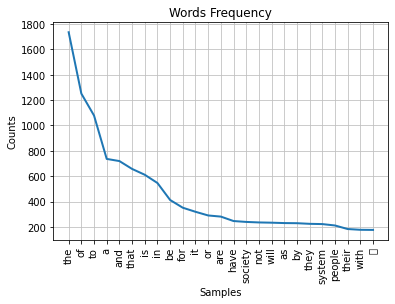

In [6]:
word_list = nltk.FreqDist(filter_words)
ax=word_list.plot(25, cumulative=False,title= "Words Frequency")

### Observation: ###
the, of, to, a, and ..... are some highly reapated words.  
Unless we find a way to remove these stop words, our analysis cannot be very useful.
for i in range(10):

In [7]:
#We are downloading the NLTL stop words and using a loop to remove them
from nltk.corpus import stopwords
stop_words= set(stopwords.words('english'))

#removing stop words
stopfree_words =[]
for word in WP_words:
    if word not in stop_words:
        stopfree_words.append(word)
stopfree_analysis= FreqDist(stopfree_words)

In [8]:
stopfree_words = dict([(m, n) for m, n in stopfree_analysis.items() if (m >= "a") and (n>50)])
stopfree_words = dict(sorted(stopfree_words.items(), key=lambda item: item[1],reverse = True))

In [9]:
print('Cleaned Words: Frequency')
for key in stopfree_words:
    try:
        print("%s: %s" % (key, filter_words[key]))
    except Exception:
        pass

Cleaned Words: Frequency
society: 239
system: 222
people: 211
: 176
power: 165
: 164
would: 152
human: 134
one: 127
technology: 120
may: 100
social: 94
: 92
many: 89
modern: 88
freedom: 84
industrial: 81
process: 71
make: 70
leftist: 70
man: 70
problems: 66
way: 64
need: 64
technological: 59
behavior: 59
work: 59
psychological: 55
leftists: 54
control: 54
use: 51
nature: 51
goals: 51


In [10]:
df2= pd.DataFrame(list(stopfree_words.items()), columns=['word', 'count'])

print ("High Frequency Words")
print(df2.head(10))
print('\n' * 2)
print ("Low Frequency Words")
print(df2.tail(10))

High Frequency Words
         word  count
0     society    239
1      system    222
2      people    211
3               176
4       power    165
5               164
6       would    152
7       human    134
8         one    127
9  technology    120



Low Frequency Words
             word  count
23           need     64
24  technological     59
25       behavior     59
26           work     59
27  psychological     55
28       leftists     54
29        control     54
30            use     51
31         nature     51
32          goals     51


C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chandra\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chandra\AppData\Roaming\Python

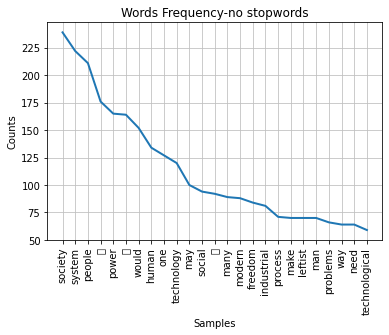

In [11]:
stopfree_analysis= FreqDist(stopfree_words)
ax1 = stopfree_analysis.plot(25, cumulative=False,title= "Words Frequency-no stopwords")

### Observation:
List changed a lot.  All expected stop words are removed. 
“society, system, people, power ......” are new first five words comparing with “the, of, to, a, and”. We still have the “would” there. 

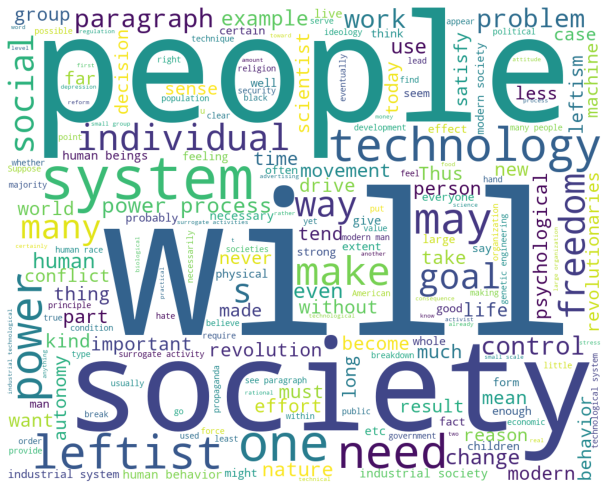

In [12]:
# importing all necessary modules

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
f = open('manifesto.txt')
manifesto = f.read()

# Unprocessed Text:
wordcloud = WordCloud(width = 1000, height = 800, background_color ='white', min_font_size = 10).generate(manifesto) 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -1)
 
plt.show()